# PART 1 - SCRAPPING DATABASE FROM COINMARKETCAP.COM

In [1]:
#Total packages used in this project
#!pip install BeautifulSoup

In [172]:
#Importing library
from bs4 import BeautifulSoup
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import tseries
import math
from scipy.stats import norm
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from tqdm import tqdm
plt.style.use('classic')

%matplotlib inline

## Scrapped database of BITCOIN _ BTC

In [2]:
#Importing the link of page
link_BTC = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20181104'
#Fetching the content from the url by using the request library
response_BTC = requests.get(link_BTC, timeout=5)
#we use the html parser to parse the url content and store it in a variable.
content_BTC = lh.fromstring(response_BTC.content, "html.parser")
tr_elements_BTC = content_BTC.xpath('//tr') #Parse data that are stored between <tr>..</tr> of HTML

In [3]:
# Check the total column in table
len(tr_elements_BTC[0])

7

In [4]:
# For each row, store each first element (header) and an empty list
col = [(t.text_content(), []) for t in tr_elements_BTC[0]]

In [5]:
#The first row is the header, data will be stored on the second row onwards
for j in range(1,len(tr_elements_BTC)):
    #T is our j'th row
    T=tr_elements_BTC[j]
    
    #If row is not of size 7, the //tr data is not from our table 
    if len(T)!=7:
        break
    
   #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data_BTC=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data_BTC=int(data_BTC)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data_BTC)
        #Increment i for the next column
        i+=1

In [6]:
[len(C) for (title,C) in col]

[2017, 2017, 2017, 2017, 2017, 2017, 2017]

In [7]:
Dict_BTC={title:column for (title,column) in col}
df_BTC=pd.DataFrame(Dict_BTC)

In [8]:
#Reversed order of dataframe
df_BTC = df_BTC[::-1]

In this project, only closing price is employed in the model of detecting bubble in cryptocurrency price movement, so other prices will be dropped

In [9]:
df_BTC = df_BTC.drop(['Open*', 'High', 'Low', 'Market Cap'], axis=1)

In [10]:
#Rename of the columns
df_BTC = df_BTC.rename(columns = {'Close**': 'Close_BTC', 'Volume': 'Vol_BTC'})

In [11]:
# Changing and sorting the format of date in database
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])

In [12]:
#Notice that data in both columns use commas as a thousands separator (under American locale)
df_BTC['Vol_BTC'] = df_BTC['Vol_BTC'].str.replace('-', '0')
df_BTC['Vol_BTC'] = df_BTC['Vol_BTC'].str.replace(',', '')

In [13]:
#Converting the types of data from 'object' to 'float'
df_BTC.iloc[:, 1:] = df_BTC.iloc[:, 1:].astype('float')

In [14]:
#List the types of data in df_clean
df_BTC.dtypes

Date         datetime64[ns]
Close_BTC           float64
Vol_BTC             float64
dtype: object

In [15]:
df_BTC.head()

,Date,Close_BTC,Vol_BTC
2016,2013-04-28,134.21,0.0
2015,2013-04-29,144.54,0.0
2014,2013-04-30,139.00,0.0
2013,2013-05-01,116.99,0.0
2012,2013-05-02,105.21,0.0


In this project, we choose total 3 top ranked cryptocurrencies including Bitcoin (BTC), Ethereum (ETH) and Ripple (XRP) to analyse the price movements and its relationship between the prices and its trading volumes, also its capitalization to answer the question of whether speculative bubbles exists in the cryptocurrencies market.

Similarly, both database of ETH and XRP are also scrapped in the folling parts.

## Scrapped database of ETHEREUM _ ETH

In [16]:
#Importing the link of page
link_ETH = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20181104'
#Fetching the content from the url by using the request library
response_ETH = requests.get(link_ETH, timeout=5)
#we use the html parser to parse the url content and store it in a variable.
content_ETH = lh.fromstring(response_ETH.content, "html.parser")
tr_elements_ETH = content_ETH.xpath('//tr') #Parse data that are stored between <tr>..</tr> of HTML

#Parse Table Header
tr_elements_ETH = content_ETH.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements_ETH[0]:
    i+=1
    name=t.text_content()
    col.append((name,[]))
    
#The first row is the header, data will be stored on the second row onwards
for j in range(1,len(tr_elements_ETH)):
    #T is our j'th row
    T=tr_elements_ETH[j]
    
    #If row is not of size 7, the //tr data is not from our table 
    if len(T)!=7:
        break
    
   #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data_ETH=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data_ETH=int(data_ETH)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data_ETH)
        #Increment i for the next column
        i+=1

Dict_ETH = {title:column for (title,column) in col}
df_ETH = pd.DataFrame(Dict_ETH)

In [17]:
#Reversed order of dataframe
df_ETH = df_ETH[::-1]

In [18]:
#Dropping column of prices in Ethereum database
df_ETH = df_ETH.drop(['Open*', 'High', 'Low', 'Market Cap'], axis=1)

#Rename of the columns
df_ETH = df_ETH.rename(columns = {'Close**': 'Close_ETH', 'Volume':'Vol_ETH'})

In [19]:
# Changing and sorting the format of date in database
df_ETH['Date'] = pd.to_datetime(df_ETH['Date'])

In [20]:
#Notice that data in both columns use commas as a thousands separator (under American locale)
df_ETH['Vol_ETH'] = df_ETH['Vol_ETH'].str.replace('-', '0')
df_ETH['Vol_ETH'] = df_ETH['Vol_ETH'].str.replace(',', '')

In [21]:
#Converting the types of data from 'object' to 'float'
df_ETH.iloc[:, 1:] = df_ETH.iloc[:, 1:].astype('float')

In [22]:
df_ETH.dtypes

Date         datetime64[ns]
Close_ETH           float64
Vol_ETH             float64
dtype: object

## Scrapped Database of Ripple _ XRP

In [23]:
#Importing the link of page
link_XRP = 'https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20181104'
#Fetching the content from the url by using the request library
response_XRP = requests.get(link_XRP, timeout=5)
#we use the html parser to parse the url content and store it in a variable.
content_XRP = lh.fromstring(response_XRP.content, "html.parser")
tr_elements_XRP = content_XRP.xpath('//tr') #Parse data that are stored between <tr>..</tr> of HTML

#Parse Table Header
tr_elements_XRP = content_XRP.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements_XRP[0]:
    i+=1
    name=t.text_content()
    col.append((name,[]))
    
#The first row is the header, data will be stored on the second row onwards
for j in range(1,len(tr_elements_XRP)):
    #T is our j'th row
    T=tr_elements_XRP[j]
    
    #If row is not of size 7, the //tr data is not from our table 
    if len(T)!=7:
        break
    
   #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data_XRP = t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data_XRP=int(data_XRP)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data_XRP)
        #Increment i for the next column
        i+=1

Dict_XRP = {title:column for (title,column) in col}
df_XRP = pd.DataFrame(Dict_XRP)

In [24]:
#Reversed order of dataframe
df_XRP = df_XRP[::-1]

In [25]:
#Dropping column of prices in Ethereum database
df_XRP = df_XRP.drop(['Open*', 'High', 'Low', 'Market Cap'], axis=1)

In [26]:
#Rename of the columns
df_XRP = df_XRP.rename(columns = {'Close**': 'Close_XRP', 'Volume':'Vol_XRP'})

In [27]:
# Changing and sorting the format of date in database
df_XRP['Date'] = pd.to_datetime(df_XRP['Date'])

In [28]:
#Notice that data in both columns use commas as a thousands separator (under American locale)
df_XRP['Vol_XRP'] = df_XRP['Vol_XRP'].str.replace('-', '0')
df_XRP['Vol_XRP'] = df_XRP['Vol_XRP'].str.replace(',', '')

In [29]:
#Converting the types of data from 'object' to 'float'
df_XRP.iloc[:, 1:] = df_XRP.iloc[:, 1:].astype('float')

# PART 2 - CONSOLIDATING AND CLEANING DATA

## Merging dataframes

In [30]:
df_merge = pd.merge(df_BTC, df_ETH, how = 'outer', on = 'Date')
df_merge = pd.merge(df_merge, df_XRP, how = 'outer', on = 'Date')
df_merge.head()

,Date,Close_BTC,Vol_BTC,Close_ETH,Vol_ETH,Close_XRP,Vol_XRP
0,2013-04-28,134.21,0.0,NaN,NaN,NaN,NaN
1,2013-04-29,144.54,0.0,NaN,NaN,NaN,NaN
2,2013-04-30,139.00,0.0,NaN,NaN,NaN,NaN
3,2013-05-01,116.99,0.0,NaN,NaN,NaN,NaN
4,2013-05-02,105.21,0.0,NaN,NaN,NaN,NaN


In [31]:
#Counting missing values
df_merge.isnull().sum()

Date           0
Close_BTC      0
Vol_BTC        0
Close_ETH    831
Vol_ETH      831
Close_XRP     98
Vol_XRP       98
dtype: int64

## Calculating the logarithmic return of cryptocurrencies

In [32]:
#Creating list of currencies
currency = ['BTC', 'ETH', 'XRP']

In [33]:
#Creating new variable of logarithmic return of each currencies
for i in currency:
    df_merge['RET_' + str(i)] = np.log(df_merge['Close_' + str(i)]).diff()

In [34]:
df_merge['RET_BTC'] = np.log(df_merge.Close_BTC) - np.log(df_merge.Close_BTC.shift(1))

## Dropping missing values in merged database

In [35]:
#Dropping missing values 
df_drop = df_merge.dropna()
df_drop.isnull().sum()

Date         0
Close_BTC    0
Vol_BTC      0
Close_ETH    0
Vol_ETH      0
Close_XRP    0
Vol_XRP      0
RET_BTC      0
RET_ETH      0
RET_XRP      0
dtype: int64

# PART 3 - DESCRIPTIVE STATISTICS

In [36]:
#Raw database
df_merge.describe()

,Close_BTC,Vol_BTC,Close_ETH,Vol_ETH,Close_XRP,Vol_XRP,RET_BTC,RET_ETH,RET_XRP
count,2017.000000,2.017000e+03,1186.000000,1.186000e+03,1919.000000,1.919000e+03,2016.000000,1185.000000,1918.000000
mean,2249.892900,1.400571e+09,214.404359,8.289993e+08,0.159703,1.906031e+08,0.001915,0.003642,0.002276
std,3441.235413,3.024913e+09,280.824974,1.244838e+09,0.343372,6.874671e+08,0.043714,0.078578,0.078177
min,68.430000,0.000000e+00,0.434829,1.021280e+05,0.002810,0.000000e+00,-0.266198,-1.302106,-0.616273
25%,319.010000,1.859730e+07,9.872500,9.131382e+06,0.006286,2.682425e+05,-0.012273,-0.026619,-0.023358
50%,592.940000,5.662510e+07,43.330000,8.255090e+07,0.008479,8.513260e+05,0.001944,-0.000857,-0.002836
75%,2506.470000,1.094950e+09,332.272500,1.470675e+09,0.201322,1.027810e+08,0.018559,0.031764,0.021177
max,19497.400000,2.384090e+10,1396.420000,9.214950e+09,3.380000,9.110440e+09,0.357451,0.412337,1.027356


In [38]:
#Clean database
df_drop.describe()

,Close_BTC,Vol_BTC,Close_ETH,Vol_ETH,Close_XRP,Vol_XRP,RET_BTC,RET_ETH,RET_XRP
count,1185.000000,1.185000e+03,1185.000000,1.185000e+03,1185.000000,1.185000e+03,1185.000000,1185.000000,1185.000000
mean,3567.036996,2.371183e+09,214.582953,8.296987e+08,0.251990,3.083827e+08,0.002639,0.003642,0.003408
std,3989.825284,3.646072e+09,280.876151,1.245130e+09,0.410702,8.539902e+08,0.039590,0.078578,0.076730
min,210.490000,1.271260e+07,0.434829,1.021280e+05,0.004090,2.481900e+04,-0.207530,-1.302106,-0.616273
25%,531.390000,6.880780e+07,9.880000,9.166430e+06,0.006490,7.505330e+05,-0.009418,-0.026619,-0.021087
50%,1172.520000,3.036680e+08,43.390000,8.362710e+07,0.009116,6.333250e+06,0.002645,-0.000857,-0.003548
75%,6529.170000,3.966230e+09,332.390000,1.470740e+09,0.336903,2.582980e+08,0.018029,0.031764,0.018576
max,19497.400000,2.384090e+10,1396.420000,9.214950e+09,3.380000,9.110440e+09,0.225119,0.412337,1.027356


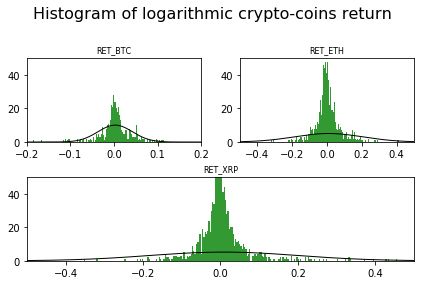

In [41]:
hist = plt.figure()
hist.suptitle("Histogram of logarithmic crypto-coins return", fontsize=16)
ax1 = hist.add_subplot(221)
ax2 = hist.add_subplot(222)
ax3 = hist.add_subplot(212)

#Set xlim and ylim in subplots
ax1.set_ylim([0,50])
ax1.set_xlim([-0.2,0.2])

ax2.set_ylim([0,50])
ax2.set_xlim([-0.5,0.5])

ax3.set_ylim([0,50])
ax3.set_xlim([-0.5,0.5])

#Fitting a normal distribution to data of log return of each coin
mu = [0,0,0]
std = [0,0,0]
for i in currency:
    mu[currency.index(i)], std[currency.index(i)] = norm.fit(df_drop['RET_' + str(i)])

x1 = np.linspace(-0.2, 0.2,500)
p1 = norm.pdf(x1,mu[0],std[0])
    
x2 = np.linspace(-0.5, 0.5,500)
p2 = norm.pdf(x1,mu[1],std[1])

x3 = np.linspace(-0.5, 0.5,500)
p3 = norm.pdf(x1,mu[2],std[2])

#Plotting histogram and its fitted normal distribution density
numbins = 500
ax1.hist(df_drop['RET_BTC'], numbins, alpha = 0.8, color = 'green')
ax1.plot(x1,p1,'k',linewidth = 1)
ax1.set_title('RET_BTC',fontsize=8)

ax2.hist(df_drop['RET_ETH'], numbins, alpha = 0.8, color = 'green')
ax2.plot(x2,p2,'k',linewidth = 1)
ax2.set_title('RET_ETH',fontsize=8)

ax3.hist(df_drop['RET_XRP'], numbins, alpha = 0.8, color = 'green')
ax3.plot(x3,p3,'k',linewidth = 1)
ax3.set_title('RET_XRP',fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()

# PART 4 - CONSTRUCTURING THE SADF AND GSADF TEST

This part is devoted to implement the SADF test which is proposed by Phillips, Wu and Yu (2011).

First of all, ADFlag function is built to calculated under the Right-tailed Augmented Dickey Fuller test with number of lag observation (as adflag in the function). This function is implemented base on the MATLAB-code provided by Shu Ping Shi work (which is available here 'https://sites.google.com/site/shupingshi/home/codes?authuser=0').

In this function, I has simplified the original function while ignoring variable of IC (choosing IC = 0 and do not employ AIC and BIC criteria in calculating ADF statistics)

## ADFlag function


In [37]:
def ADF(y, adflag):
    dy = np.diff(y)
    T1 = dy.shape[0]
    x1 = np.c_[np.array(y)[:T1], np.ones(T1)]
    T = T1 - adflag
    dof = T - 2
    
    ADF = np.zeros(adflag+1)
        
        
    #Model specification
    xx = x1[adflag:T1, :] #from k+1 to the end (including y1 and x)
    dy01 = dy[adflag:T1] #from k+1 to the end (including dy0)
        
    if adflag > 0:
        x2 = np.c_[xx, dy[:T1-1].reshape(-1, 1)]            
    else:
        x2 = xx
        
            
    #OLS regression
    beta = np.dot(np.linalg.inv(np.dot(x2.T, x2)), np.dot(x2.T, dy01))
    eps = dy01 - x2.dot(beta)
        
    se = np.dot(eps.T, eps)/dof
    sig = np.sqrt(np.diag(se*np.linalg.inv(np.dot(x2.T, x2))))
    
    ADFlag = beta[1]/sig[1]
            
    return ADFlag

## SADF Test

In [38]:
#CONTRUCTURING SADF TEST - PWY TEST (2011)
N = len(df_drop['RET_BTC'])

#Calculating the optimal window
r_window = 0.01 + 1.8/np.sqrt(N)
window = np.floor(r_window*N).astype('int')
sadfstat_BTC = []
sadfstat_ETH = []
sadfstat_XRP = []

In [39]:
for i in np.arange(window, N):
    temp = ADF(df_drop.loc[832:(i+832), 'RET_BTC'],1)
    sadfstat_BTC.append(temp)
    
    SADF_BTC = max(sadfstat_BTC)

In [40]:
for i in np.arange(window, N):
    temp = ADF(df_drop.loc[832:(i+832), 'RET_ETH'],1)
    sadfstat_ETH.append(temp)
    
    SADF_ETH = max(sadfstat_ETH)

In [41]:
for i in np.arange(window, N):
    temp = ADF(df_drop.loc[832:(i+832), 'RET_XRP'],1)
    sadfstat_XRP.append(temp)

    SADF_XRP = max(sadfstat_XRP)

In [42]:
Date = df_drop.Date[np.arange(window+832,2017)]

#Creating dataframe of SADF statistics
df_sadf = pd.DataFrame({'Date':Date, 'SADF_BTC':np.array(sadfstat_BTC),
                        'SADF_ETH':np.array(sadfstat_ETH), 'SADF_XRP':np.array(sadfstat_XRP)})

#Critical value at 5% of SADF test
for n in currency:
    df_sadf['CV_' + str(n)] = df_sadf['SADF_' + str(n)].quantile(0.95)*np.ones(len(df_sadf.Date))
    

In [43]:
df_sadf.head()

,Date,SADF_BTC,SADF_ETH,SADF_XRP,CV_BTC,CV_ETH,CV_XRP
905,2015-10-20,0.031307,-0.465606,-1.975158,3.393515,2.956153,1.721161
906,2015-10-21,0.011389,-0.409911,-2.012440,3.393515,2.956153,1.721161
907,2015-10-22,0.126488,-0.154355,-2.002927,3.393515,2.956153,1.721161
908,2015-10-23,0.181402,-0.271679,-2.029473,3.393515,2.956153,1.721161
909,2015-10-24,0.277237,-0.198680,-2.042214,3.393515,2.956153,1.721161


In [44]:
#Setting time index in dataframe
df_sadf['Time'] = pd.to_datetime(df_sadf['Date'])
df_sadf = df_sadf.set_index('Time')
df_sadf.drop(['Date'], axis = 1, inplace = True)
df_sadf.head()

,SADF_BTC,SADF_ETH,SADF_XRP,CV_BTC,CV_ETH,CV_XRP
Time,,,,,,
2015-10-20,0.031307,-0.465606,-1.975158,3.393515,2.956153,1.721161
2015-10-21,0.011389,-0.409911,-2.012440,3.393515,2.956153,1.721161
2015-10-22,0.126488,-0.154355,-2.002927,3.393515,2.956153,1.721161
2015-10-23,0.181402,-0.271679,-2.029473,3.393515,2.956153,1.721161
2015-10-24,0.277237,-0.198680,-2.042214,3.393515,2.956153,1.721161


In [51]:
#Setting time index in dataframe
#df_drop['Time'] = pd.to_datetime(df_drop['Date'])
#df_drop = df_drop.set_index('Time')
#df_drop.drop(['Date'], axis = 1, inplace = True)

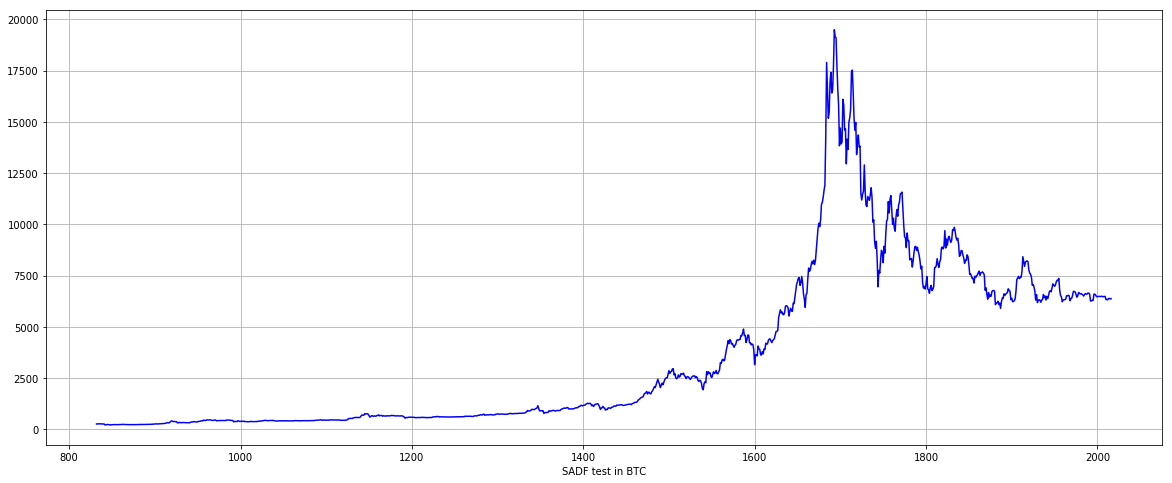

In [50]:
sadf = plt.figure(figsize=(20,8))
plt.xlabel('SADF test in BTC')

ax1 = df_drop.Close_BTC.plot(color='blue', grid=True, label='Close_BTC')
#ax2 = df_drop.Close_ETH.plot(color='red', grid=True, label='Close_ETH')
#ax3 = df_drop.Close_XRP.plot(color='black', grid=True, label='Close_XRP')

#h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#h3, l3 = ax3.get_legend_handles_labels()



#plt.legend( l1+l2+l3, loc=2)
plt.show()

In [92]:
df_drop.reset_index(drop = True, inplace= True)
df_drop.head()

,Date,Close_BTC,Vol_BTC,Close_ETH,Vol_ETH,Close_XRP,Vol_XRP,RET_BTC,RET_ETH,RET_XRP
0,2015-08-08,261.00,58533000.0,0.753325,674188.0,0.008476,678295.0,-0.068768,-1.302106,0.038975
1,2015-08-09,265.08,23789600.0,0.701897,532170.0,0.008808,531969.0,0.015511,-0.070710,0.038422
2,2015-08-10,264.47,20979400.0,0.708448,405283.0,0.008750,472973.0,-0.002304,0.009290,-0.006607
3,2015-08-11,270.39,25433900.0,1.070000,1463100.0,0.008591,282461.0,0.022138,0.412337,-0.018339
4,2015-08-12,266.38,26815400.0,1.220000,2150620.0,0.008271,287463.0,-0.014942,0.131192,-0.037960


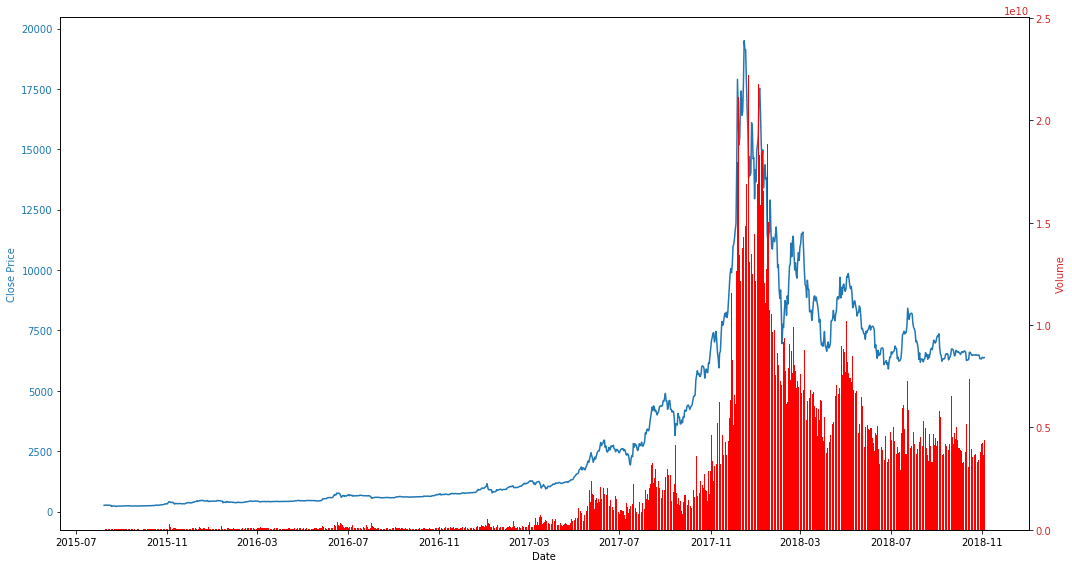

In [87]:
observation_dates = list(map(pd.to_datetime, df_drop['Date']))
fig, ax1 = plt.subplots(figsize = (15, 8))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(observation_dates, df_drop['Close_BTC'], color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
ax2.bar(observation_dates, df_drop['Vol_BTC'], color = 'red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [94]:
df_sadf.reset_index(inplace = True)
df_sadf.rename(columns = {'Time': 'Date'}, inplace= True)
df_sadf.head()

,Date,SADF_BTC,SADF_ETH,SADF_XRP,CV_BTC,CV_ETH,CV_XRP
0,2015-10-20,0.031307,-0.465606,-1.975158,3.393515,2.956153,1.721161
1,2015-10-21,0.011389,-0.409911,-2.012440,3.393515,2.956153,1.721161
2,2015-10-22,0.126488,-0.154355,-2.002927,3.393515,2.956153,1.721161
3,2015-10-23,0.181402,-0.271679,-2.029473,3.393515,2.956153,1.721161
4,2015-10-24,0.277237,-0.198680,-2.042214,3.393515,2.956153,1.721161


In [103]:
df_sadf_merge = pd.merge(df_sadf, df_drop, how = 'left', left_on = 'Date', right_on = 'Date')

In [104]:
df_sadf_merge.head()

,Date,SADF_BTC,SADF_ETH,SADF_XRP,CV_BTC,CV_ETH,CV_XRP,Close_BTC,Vol_BTC,Close_ETH,Vol_ETH,Close_XRP,Vol_XRP,RET_BTC,RET_ETH,RET_XRP
0,2015-10-20,0.031307,-0.465606,-1.975158,3.393515,2.956153,1.721161,269.46,30889800.0,0.434829,383921.0,0.004731,420949.0,0.022594,-0.117438,-0.063865
1,2015-10-21,0.011389,-0.409911,-2.012440,3.393515,2.956153,1.721161,266.27,25637300.0,0.447329,609085.0,0.004697,243503.0,-0.011909,0.028341,-0.007213
2,2015-10-22,0.126488,-0.154355,-2.002927,3.393515,2.956153,1.721161,274.02,37808600.0,0.567702,924822.0,0.004723,305170.0,0.028690,0.238302,0.005520
3,2015-10-23,0.181402,-0.271679,-2.029473,3.393515,2.956153,1.721161,276.50,29442500.0,0.539657,878822.0,0.004677,296217.0,0.009010,-0.050663,-0.009787
4,2015-10-24,0.277237,-0.198680,-2.042214,3.393515,2.956153,1.721161,281.65,25942400.0,0.563590,258356.0,0.004662,189900.0,0.018454,0.043393,-0.003212


In [125]:
index = df_sadf_merge.loc[df_sadf_merge['SADF_BTC'] > df_sadf_merge['CV_BTC']].index
x = df_sadf_merge['Date'].loc[index].values

In [197]:
x1 = df_sadf_merge['Date'].values
y1 = df_sadf_merge['SADF_BTC'].values
y2 = df_sadf_merge['CV_BTC'].values
where = y1 > y2

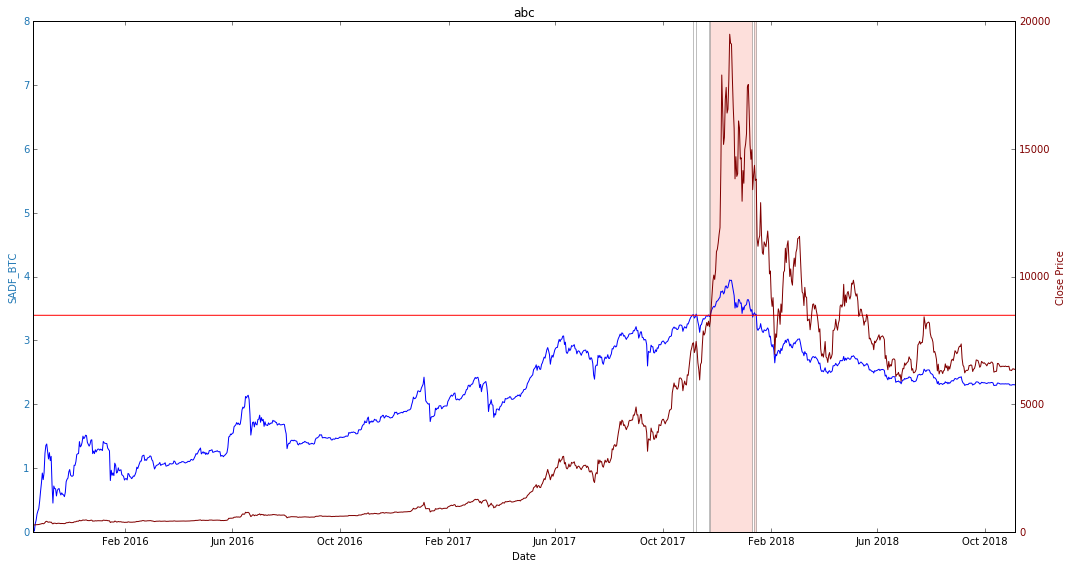

In [199]:
dates = list(map(pd.to_datetime, df_sadf_merge['Date']))
fig, ax1 = plt.subplots(figsize = (15, 8))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('SADF_BTC', color=color)
ax1.plot(dates, df_sadf_merge['SADF_BTC'], color = 'blue')
ax1.plot(dates, df_sadf_merge['CV_BTC'], color = 'red')
ax1.set_ylim(0, 8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x1, np.zeros(x1.shape[0]), 8*np.ones(x1.shape[0]), where = where,
                       facecolor='salmon', 
                       alpha=0.25)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Close Price', color='maroon')  # we already handled the x-label with ax1
ax2.plot(dates, df_sadf_merge['Close_BTC'], color = 'maroon')
ax2.tick_params(axis='y', labelcolor='maroon')

ax1.set_title('abc')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

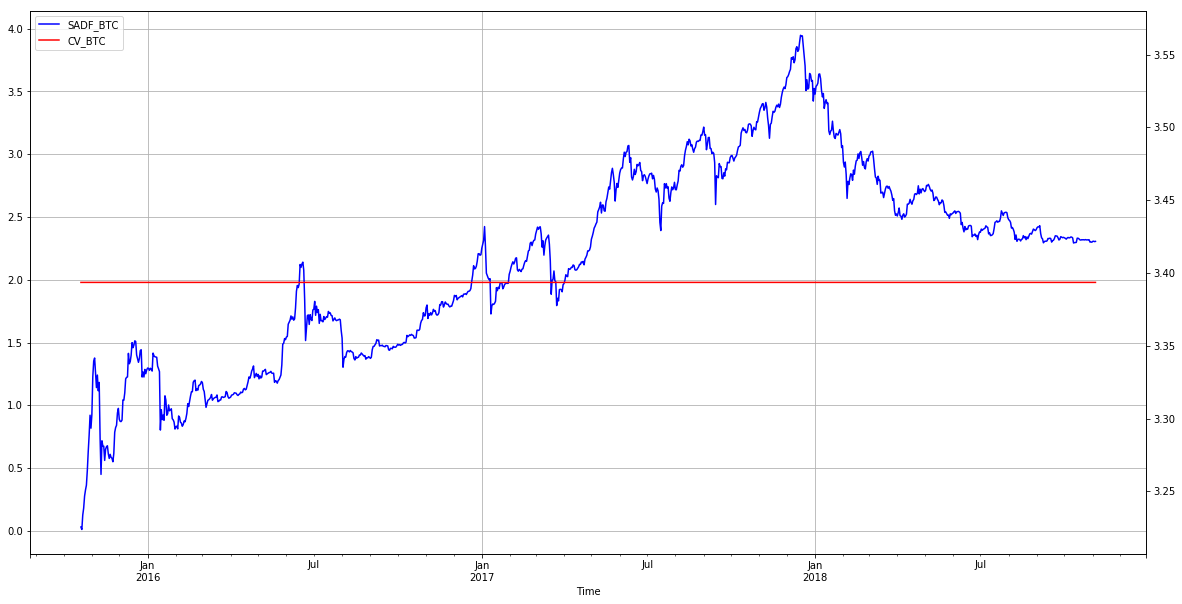

In [51]:
sadf = plt.figure(figsize=(20,10))
plt.xlabel('SADF test in BTC')

ax1 = df_sadf.SADF_BTC.plot(color='blue', grid=True, label='SADF_BTC')
ax2 = df_sadf.CV_BTC.plot(color='red', grid=True, secondary_y=True, label='CV_BTC')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

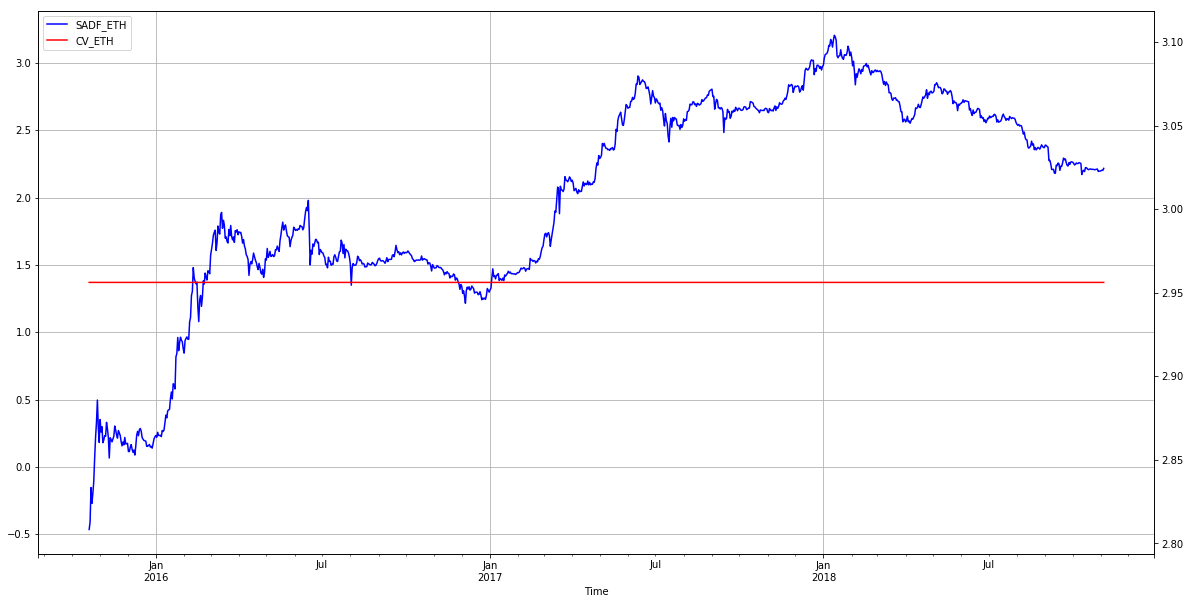

In [54]:
sadf = plt.figure(figsize=(20,10))
plt.xlabel('SADF test in BTC')

ax1 = df_sadf.SADF_ETH.plot(color='blue', grid=True, label='SADF_ETH')
ax2 = df_sadf.CV_ETH.plot(color='red', grid=True, secondary_y=True, label='CV_ETH')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

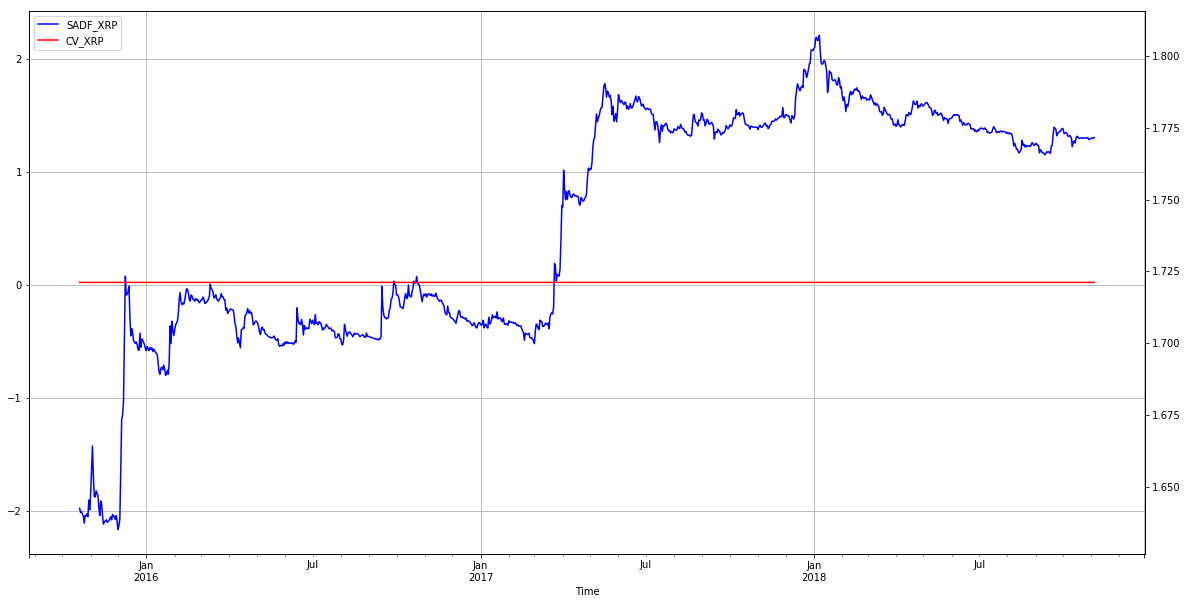

In [55]:
sadf = plt.figure(figsize=(20,10))
plt.xlabel('SADF test in BTC')

ax1 = df_sadf.SADF_XRP.plot(color='blue', grid=True, label='SADF_XRP')
ax2 = df_sadf.CV_XRP.plot(color='red', grid=True, secondary_y=True, label='CV_XRP')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

## GSADF TEST

Generalized Sup ADF test (hereafter PSY test or PSY method) was developed in the study of Phillips, Shi and Yu (2013) in detecting the exuberance episodes in historical data of S&P500 ranging from January 1871 to December 2010. This method was improved based on its precedessor (PWY test - SADF test) by employing the ex-ante procedure in dating algorithm (expanding more subsamples by changing the initial point of each repeated sequential window). This explained why PSY method outperforms than the previous one in detecting multiple bubbles and delivering a more consistent bursting timing.

The following part is devoted to develop the PSY method. Before implementing the GSADF test, optimal window is calculated as the previous PWY method and the GSADF test is built based on the ADFlag statistics (as constructed in previous part (Part 4))

In [45]:
#CONTRUCTURING GSADF TEST - PSY TEST (2013)
N = 832 + len(df_drop['RET_BTC']) 

#Calculating the optimal window
r_window = 0.01 + 1.8/np.sqrt(N)
window = np.floor(r_window*N).astype('int')

gsadfstat_BTC = []
gsadfstat_ETH = []
gsadfstat_XRP = []
        

### GSADF Test with Log return of BTC

In [46]:
#GSADF TEST (PSY test - 2013)
for r2 in tqdm(np.arange((832 + window), N)):
    for r1 in np.arange(832, (r2 - window + 1)):
        psy_stat_BTC = []
        temp = ADF(df_drop.loc[r1:r2, 'RET_BTC'],1)
        psy_stat_BTC.append(temp)
    
    gsadfstat_BTC.append(max(psy_stat_BTC)) #Sequence of the SADF statistics in each window

#GSADF Statistics        
GSADF_BTC = max(gsadfstat_BTC) 

100%|██████████████████████████████████████████████████████████████████████████████| 1084/1084 [06:59<00:00,  1.35it/s]


### GSADF Test with Log return of ETH

In [47]:
#GSADF TEST (PSY test - 2013)
for r2 in tqdm(np.arange((832 + window), N)):
    for r1 in np.arange(832, (r2 - window + 1)):
        psy_stat_ETH = []
        temp = ADF(df_drop.loc[r1:r2, 'RET_ETH'],1)
        psy_stat_ETH.append(temp)
    
    gsadfstat_ETH.append(max(psy_stat_ETH))
        
GSADF_ETH = max(gsadfstat_ETH)

100%|██████████████████████████████████████████████████████████████████████████████| 1084/1084 [06:48<00:00,  1.26it/s]


### GSADF Test with Log return of XRP

In [48]:
#GSADF TEST (PSY test - 2013)
for r2 in tqdm(np.arange((832 + window), N)):
    for r1 in np.arange(832, (r2 - window + 1)):
        psy_stat_XRP = []
        temp = ADF(df_drop.loc[r1:r2, 'RET_XRP'],1)
        psy_stat_XRP.append(temp)
    
    gsadfstat_XRP.append(max(psy_stat_XRP))
        
GSADF_XRP = max(gsadfstat_XRP)

100%|██████████████████████████████████████████████████████████████████████████████| 1084/1084 [06:52<00:00,  1.27it/s]


In [49]:
Date = df_drop.Date[np.arange(window+832,2017)]

#Creating dataframe of SADF statistics
df_gsadf = pd.DataFrame({'Date':Date, 'GSADF_BTC':np.array(gsadfstat_BTC),
                        'GSADF_ETH':np.array(gsadfstat_ETH), 'GSADF_XRP':np.array(gsadfstat_XRP)})

#Critical value at 5% of SADF test
for n in currency:
    df_gsadf['CV_' + str(n)] = df_gsadf['GSADF_' + str(n)].quantile(0.95)*np.ones(len(df_gsadf.Date))

In [50]:
#Setting time index in dataframe
df_gsadf['Time'] = pd.to_datetime(df_gsadf['Date'])
df_gsadf = df_gsadf.set_index('Time')
df_gsadf.drop(['Date'], axis = 1, inplace = True)

In [51]:
df_gsadf.to_csv('df_gsadf.csv', index = False)

In [161]:
df_gsadf.reset_index(inplace = True)
df_gsadf.rename(columns = {'Time': 'Date'}, inplace= True)
df_gsadf.head()

,Date,GSADF_BTC,GSADF_ETH,GSADF_XRP,CV_BTC,CV_ETH,CV_XRP
0,2015-11-17,0.670887,0.303301,-2.087925,2.304288,2.689827,1.929027
1,2015-11-18,0.711984,0.261478,-2.076539,2.304288,2.689827,1.929027
2,2015-11-19,0.585241,-0.189650,-2.050499,2.304288,2.689827,1.929027
3,2015-11-20,0.590060,-0.284489,-1.961825,2.304288,2.689827,1.929027
4,2015-11-21,0.636872,-0.710555,-1.912465,2.304288,2.689827,1.929027


In [163]:
df_gsadf_merge = pd.merge(df_gsadf, df_drop, how = 'left', left_on = 'Date', right_on = 'Date')

In [164]:
df_gsadf_merge.head()

,Date,GSADF_BTC,GSADF_ETH,GSADF_XRP,CV_BTC,CV_ETH,CV_XRP,Close_BTC,Vol_BTC,Close_ETH,Vol_ETH,Close_XRP,Vol_XRP,RET_BTC,RET_ETH,RET_XRP
0,2015-11-17,0.670887,0.303301,-2.087925,2.304288,2.689827,1.929027,335.09,51001600.0,1.010000,1145440.0,0.004250,243681.0,0.013036,0.083638,0.003772
1,2015-11-18,0.711984,0.261478,-2.076539,2.304288,2.689827,1.929027,334.59,43783800.0,0.993319,681104.0,0.004258,246794.0,-0.001493,-0.016654,0.001881
2,2015-11-19,0.585241,-0.189650,-2.050499,2.304288,2.689827,1.929027,326.15,45011100.0,0.955532,443528.0,0.004222,173712.0,-0.025549,-0.038784,-0.008491
3,2015-11-20,0.590060,-0.284489,-1.961825,2.304288,2.689827,1.929027,322.02,53152900.0,0.924920,614335.0,0.004227,312768.0,-0.012744,-0.032561,0.001184
4,2015-11-21,0.636872,-0.710555,-1.912465,2.304288,2.689827,1.929027,326.93,28200500.0,0.976140,455976.0,0.004245,182628.0,0.015132,0.053899,0.004249


In [181]:
index2 = df_gsadf_merge.loc[df_gsadf_merge['GSADF_BTC'] > df_gsadf_merge['CV_BTC']].index
x2 = df_gsadf_merge['Date'].loc[index2].values

In [186]:
x2 = df_gsadf_merge['Date'].values
y1 = df_gsadf_merge['GSADF_BTC'].values
y2 = df_gsadf_merge['CV_BTC'].values
where = y1 > y2

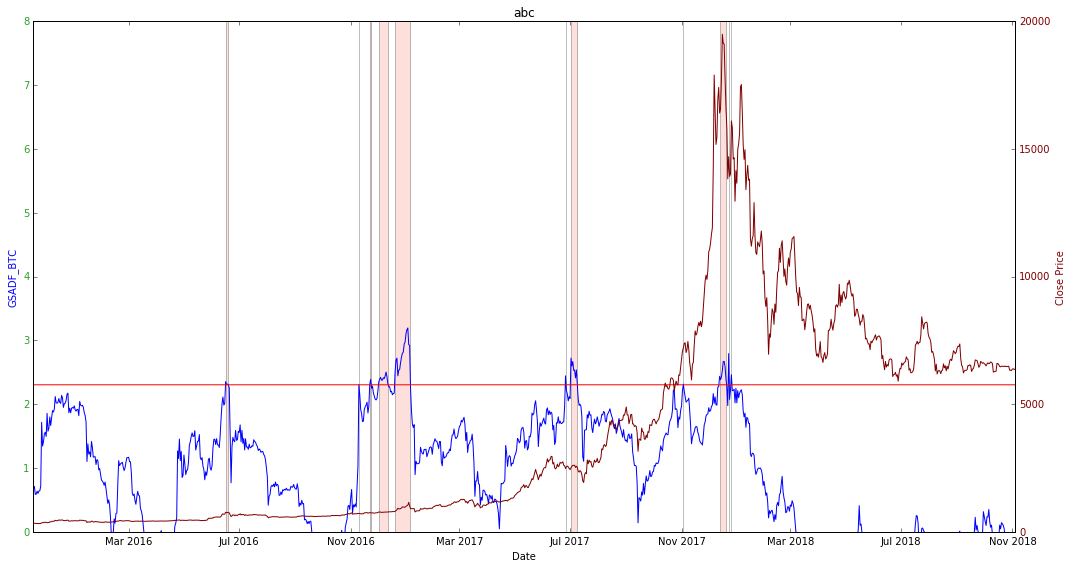

In [196]:
dates = list(map(pd.to_datetime, df_gsadf_merge['Date']))
fig, ax1 = plt.subplots(figsize = (15, 8))

ax1.set_xlabel('Date')
ax1.set_ylabel('GSADF_BTC', color='blue')
ax1.plot(dates, df_gsadf_merge['GSADF_BTC'], color = 'blue')
ax1.plot(dates, df_gsadf_merge['CV_BTC'], color = 'red')
ax1.set_ylim(0, 8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x2, np.zeros(x2.shape[0]), 8*np.ones(x2.shape[0]), where = where, 
                       facecolor='salmon', 
                       alpha=0.25)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Close Price', color='maroon')  # we already handled the x-label with ax1
ax2.plot(dates, df_gsadf_merge['Close_BTC'], color = 'maroon')
ax2.tick_params(axis='y', labelcolor='maroon')

ax1.set_title('abc')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

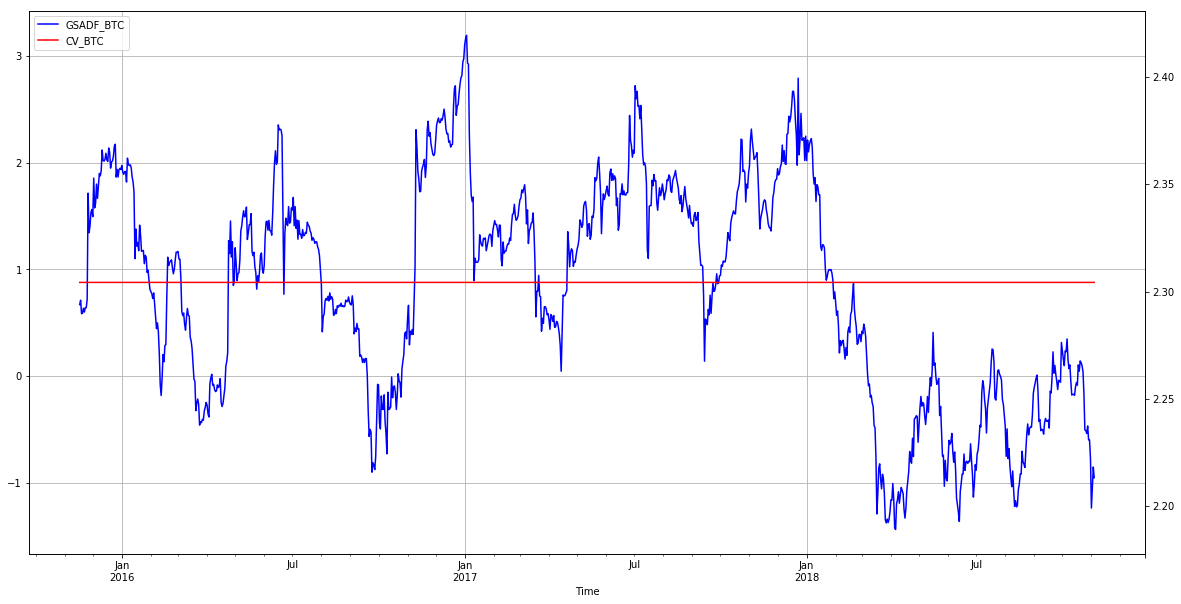

In [62]:
gsadf = plt.figure(figsize=(20,10))
plt.xlabel('GSADF test in BTC')

ax1 = df_gsadf.GSADF_BTC.plot(color='blue', grid=True, label='GSADF_BTC')
ax2 = df_gsadf.CV_BTC.plot(color='red', grid=True, secondary_y=True, label='CV_BTC')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

The final part - VISUAL ANALYSIS

Ideas
    
   Comparing the volume and price movement or the log return (line and barchart)
    
   Comparing SADF and GSADF test by plotting both test statistics sequence and its critical values (better for highlight the zone of bubble - this is called dating algorithm)
    